In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

root_dir = '/content/drive/My Drive'

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/ziua-3.zip'

Archive:  /content/drive/MyDrive/ziua-3.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('/content/train.csv')
pd.set_option('display.max_columns' , None)

In [5]:
df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


<Axes: xlabel='N_Days', ylabel='Count'>

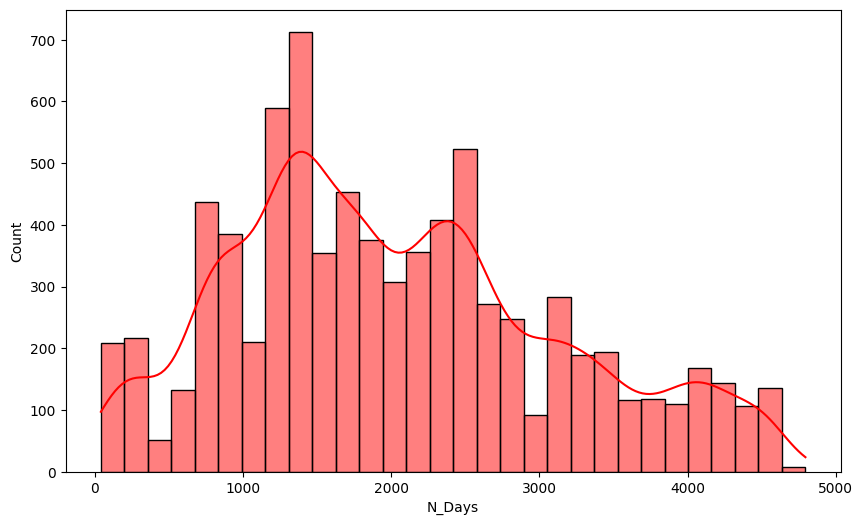

In [6]:
plt.figure(figsize = (10, 6))
sns.histplot(data = df['N_Days'], color = 'red', kde = True, bins = 30)

In [7]:
df['Drug'].value_counts()

,count
Drug,
Placebo,4010
D-penicillamine,3895


In [8]:
df = pd.get_dummies(df, columns = ['Drug'])

In [9]:
df['Age'] = df['Age'] / 365

In [10]:
df = pd.get_dummies(df, columns = ['Sex'])

In [11]:
df['Ascites'].value_counts()

,count
Ascites,
N,7525
Y,380


In [12]:
df['Ascites'] = df['Ascites'].map({'N': 0, 'Y': 1})

In [13]:
df

,id,N_Days,Age,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Drug_D-penicillamine,Drug_Placebo,Sex_F,Sex_M
0,0,999,58.991781,0,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D,True,False,False,True
1,1,2574,52.704110,0,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C,False,True,True,False
2,2,3428,37.608219,0,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D,False,True,True,False
3,3,2576,50.575342,0,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C,False,True,True,False
4,4,788,45.638356,0,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,46.134247,0,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C,True,False,True,False
7901,7901,1492,46.660274,0,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C,False,True,True,False
7902,7902,1576,70.884932,0,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D,True,False,True,False
7903,7903,3584,62.904110,0,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D,True,False,False,True


In [14]:
df['Hepatomegaly'] = df['Hepatomegaly'].map({'N': 0, 'Y': 1})

In [15]:
df['Spiders'] = df['Spiders'].map({'N': 0, 'Y': 1})

In [16]:
df['Edema'].value_counts()

,count
Edema,
N,7161
S,399
Y,345


In [17]:
correlation_matrix = df[['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']].corr()
print(correlation_matrix)

               Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
Bilirubin       1.000000     0.302153 -0.303191  0.442223  0.131317  0.368653   
Cholesterol     0.302153     1.000000 -0.091830  0.168266  0.129131  0.326864   
Albumin        -0.303191    -0.091830  1.000000 -0.218479 -0.083582 -0.200928   
Copper          0.442223     0.168266 -0.218479  1.000000  0.124058  0.323226   
Alk_Phos        0.131317     0.129131 -0.083582  0.124058  1.000000  0.128746   
SGOT            0.368653     0.326864 -0.200928  0.323226  0.128746  1.000000   
Tryglicerides   0.315681     0.274044 -0.112304  0.290435  0.087789  0.155287   
Platelets      -0.081987     0.091455  0.141284 -0.107894  0.047869 -0.042004   
Prothrombin     0.294325     0.023761 -0.204600  0.238771  0.079517  0.136766   

               Tryglicerides  Platelets  Prothrombin  
Bilirubin           0.315681  -0.081987     0.294325  
Cholesterol         0.274044   0.091455     0.023761  
Albumin            -0.11

<Axes: >

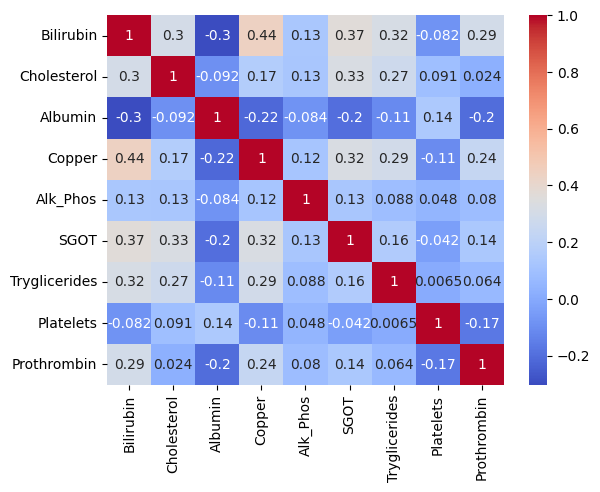

In [18]:
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')

In [19]:
df

,id,N_Days,Age,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Drug_D-penicillamine,Drug_Placebo,Sex_F,Sex_M
0,0,999,58.991781,0,0,0,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D,True,False,False,True
1,1,2574,52.704110,0,0,0,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C,False,True,True,False
2,2,3428,37.608219,0,1,1,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D,False,True,True,False
3,3,2576,50.575342,0,0,0,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C,False,True,True,False
4,4,788,45.638356,0,1,0,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,46.134247,0,0,0,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C,True,False,True,False
7901,7901,1492,46.660274,0,1,0,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C,False,True,True,False
7902,7902,1576,70.884932,0,0,1,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D,True,False,True,False
7903,7903,3584,62.904110,0,1,0,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D,True,False,False,True


In [20]:
df['Edema'] = df['Edema'].map({'N': 0, 'S': 0.5, 'Y': 1})

In [21]:
df

,id,N_Days,Age,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Drug_D-penicillamine,Drug_Placebo,Sex_F,Sex_M
0,0,999,58.991781,0,0,0,0.0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D,True,False,False,True
1,1,2574,52.704110,0,0,0,0.0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C,False,True,True,False
2,2,3428,37.608219,0,1,1,1.0,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D,False,True,True,False
3,3,2576,50.575342,0,0,0,0.0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C,False,True,True,False
4,4,788,45.638356,0,1,0,0.0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,46.134247,0,0,0,0.0,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C,True,False,True,False
7901,7901,1492,46.660274,0,1,0,0.0,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C,False,True,True,False
7902,7902,1576,70.884932,0,0,1,0.5,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D,True,False,True,False
7903,7903,3584,62.904110,0,1,0,0.0,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D,True,False,False,True


In [22]:
df = pd.get_dummies(df, columns = ['Status'])

In [23]:
df

,id,N_Days,Age,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_D-penicillamine,Drug_Placebo,Sex_F,Sex_M,Status_C,Status_CL,Status_D
0,0,999,58.991781,0,0,0,0.0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,True,False,False,True,False,False,True
1,1,2574,52.704110,0,0,0,0.0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,False,True,True,False,True,False,False
2,2,3428,37.608219,0,1,1,1.0,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,False,True,True,False,False,False,True
3,3,2576,50.575342,0,0,0,0.0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,False,True,True,False,True,False,False
4,4,788,45.638356,0,1,0,0.0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,46.134247,0,0,0,0.0,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,True,False,True,False,True,False,False
7901,7901,1492,46.660274,0,1,0,0.0,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,False,True,True,False,True,False,False
7902,7902,1576,70.884932,0,0,1,0.5,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,True,False,True,False,False,False,True
7903,7903,3584,62.904110,0,1,0,0.0,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,True,False,False,True,False,False,True


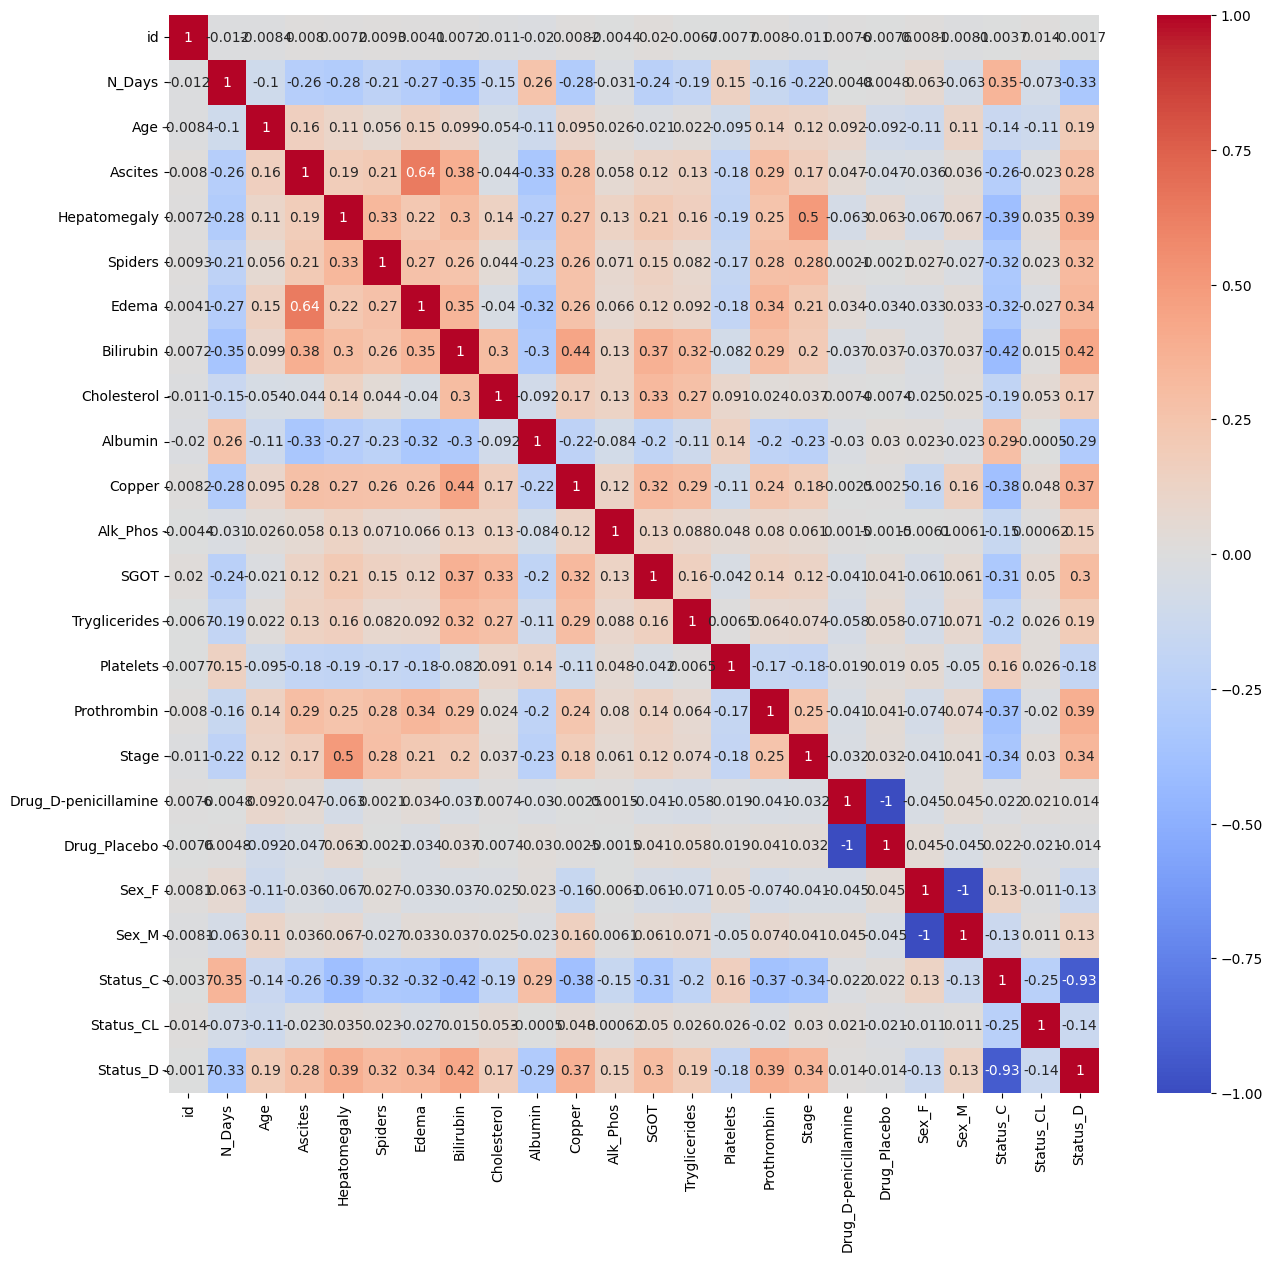

In [24]:
plt.figure(figsize = (15, 14))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [25]:
X = df[[
    'N_Days',
    'Age',
    'Ascites',
    'Hepatomegaly',
    'Spiders',
    'Edema',
    'Bilirubin',
    'Cholesterol',
    'Albumin',
    'Copper',
    'Alk_Phos',
    'SGOT',
    'Tryglicerides',
    'Platelets',
    'Prothrombin',
    'Stage',
    'Drug_D-penicillamine',
    'Drug_Placebo',
    'Sex_F',
    'Sex_M'
]]

In [42]:
y = df[[
    'Status_C',
    'Status_CL',
    'Status_D'
]]

In [32]:
y1 = df[[
    'Status_C'
]]

In [33]:
y2 = df[[
    'Status_CL'
]]

In [34]:
y3 = df[[
    'Status_D'
]]

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split

from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [54]:
base_classifier = LGBMClassifier()
model = MultiOutputClassifier(base_classifier, n_jobs = -1)
model.fit(X_train, y_train)
y_pred_proba = [model.estimators_[i].predict_proba(X_test) for i in range(len(y.columns))]

In [55]:
y_pred_proba

[array([[0.02871951, 0.97128049],
        [0.60086211, 0.39913789],
        [0.12559585, 0.87440415],
        ...,
        [0.28407231, 0.71592769],
        [0.05965061, 0.94034939],
        [0.46090063, 0.53909937]]),
 array([[0.99875905, 0.00124095],
        [0.98450877, 0.01549123],
        [0.99851568, 0.00148432],
        ...,
        [0.99801896, 0.00198104],
        [0.98071986, 0.01928014],
        [0.97006248, 0.02993752]]),
 array([[0.97752989, 0.02247011],
        [0.65825281, 0.34174719],
        [0.89787327, 0.10212673],
        ...,
        [0.69070401, 0.30929599],
        [0.96052162, 0.03947838],
        [0.72149441, 0.27850559]])]

In [56]:
accuracies = [accuracy_score(y_test.iloc[:, i], y_pred_proba[i][:, 1] > 0.5) for i in range(len(y.columns))]
accuracies

[0.8545224541429475, 0.9709044908285895, 0.8488298545224542]

In [57]:
# Predicting the test data
df_testing = pd.read_csv('/content/test.csv')

In [58]:
df_testing = pd.get_dummies(df_testing, columns = ['Drug'])
df_testing['Age'] = df_testing['Age'] / 365
df_testing = pd.get_dummies(df_testing, columns = ['Sex'])
df_testing['Ascites'] = df_testing['Ascites'].map({'N': 0, 'Y': 1})
df_testing['Hepatomegaly'] = df_testing['Hepatomegaly'].map({'N': 0, 'Y': 1})
df_testing['Spiders'] = df_testing['Spiders'].map({'N': 0, 'Y': 1})
df_testing['Edema'] = df_testing['Edema'].map({'N': 0, 'S': 0.5, 'Y': 1})


In [59]:
X_testing = df_testing[[
    'N_Days',
    'Age',
    'Ascites',
    'Hepatomegaly',
    'Spiders',
    'Edema',
    'Bilirubin',
    'Cholesterol',
    'Albumin',
    'Copper',
    'Alk_Phos',
    'SGOT',
    'Tryglicerides',
    'Platelets',
    'Prothrombin',
    'Stage',
    'Drug_D-penicillamine',
    'Drug_Placebo',
    'Sex_F',
    'Sex_M'
]]

In [60]:
y_pred_proba_new = [model.estimators_[i].predict_proba(X_testing) for i in range(len(y.columns))]

In [62]:
submission_df = pd.DataFrame({
    'id': df_testing['id'],
    'Status_C': y_pred_proba_new[0][:, 1],  # Adjust index for the class of interest
    'Status_CL': y_pred_proba_new[1][:, 1],
    'Status_D': y_pred_proba_new[2][:, 1]
})

In [63]:
submission_df.to_csv('submission.csv', index = False)

In [64]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
df_testing

,id,N_Days,Age,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_D-penicillamine,Drug_Placebo,Sex_F,Sex_M
0,7905,3839,54.038356,0,1,0,0.0,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0,True,False,True,False
1,7906,2468,41.027397,0,0,0,0.0,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0,True,False,True,False
2,7907,51,36.024658,0,1,0,1.0,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0,False,True,True,False
3,7908,2330,56.191781,0,0,0,0.0,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0,True,False,True,False
4,7909,1615,60.010959,0,1,0,0.0,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13171,2870,33.641096,0,0,0,0.0,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0,False,True,True,False
5267,13172,1770,67.953425,0,0,0,0.0,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0,False,True,True,False
5268,13173,3707,46.547945,0,1,0,0.0,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0,True,False,True,False
5269,13174,1216,32.254795,0,0,0,0.0,0.7,329.0,3.80,52.0,678.0,57.00,126.0,306.0,10.2,1.0,False,True,True,False
